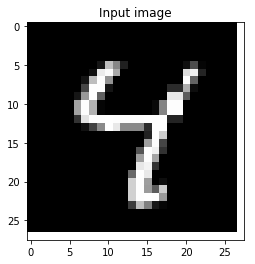

In [5]:
import keras
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img,save_img
import matplotlib.pyplot as plt
import numpy as np

# Set paths
imagepath = "mnist.png"
encoderpath = 'encoder.h5'
preprocessedpath = 'preprocessed.png'

# load model
# Keras might complain that no training configuration is included in the file, 
# but we don't need to train this model anymore, so this is not necessary.
# ---> This warning can be ignored!
encoder = load_model(encoderpath)

# load image
img = load_img(imagepath,target_size=(28,28),color_mode='grayscale')      # this is a PIL image
# Save preprocessed image in array with extra channel
image = np.zeros((28,28,1))
image[:,:,0] = img
save_img(preprocessedpath,image)
# Show image
plt.imshow(img)
plt.title("Input image")
# convert image to array for keras
x = img_to_array(img)          # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# Compress using the encoder model
compressed = encoder.predict(x)

#Save array
np.save(imagepath,compressed)

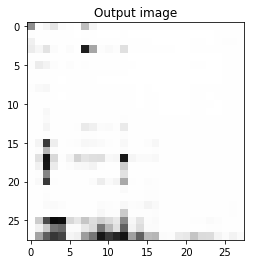

In [7]:
import keras
from keras.models import load_model
from keras.preprocessing.image import array_to_img,save_img
import matplotlib.pyplot as plt
import numpy as np

# Set paths
decoderpath = 'decoder.h5'
decompressedpath = 'decompressed.png'
compressedpath = 'mnist.png.npy'

# load compressed file

compressed = np.load(compressedpath)

# load model
decoder = load_model(decoderpath)

# Decompress using the decoder model
decompressed = decoder.predict(compressed)

# select correct (useful) channels
array = decompressed[0,:,:,:] 

# convert to image
image = array_to_img(array)

# plot image
plt.imshow(image)
plt.title("Output image")
# Store in array with extra channel
image_saver = np.zeros((28,28,1))
image_saver[:,:,0] = image
# Save decompressed image
save_img(decompressedpath,image_saver)